# Contoso Online Sales

# 1 Load

## 1.1 Load Lybraries


In [1]:
import pandas as pd
import polars as pl
import numpy as np

#importar la biblioteca
from sklearn.metrics import r2_score

#bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Optimization
from sklearn.model_selection import KFold #división del dataset en n pedazos 
from sklearn.model_selection import cross_val_score #tecnica cross value
from sklearn.model_selection import RandomizedSearchCV

from datetime import datetime

## 1.2 Load in Pandas

In [2]:
# Leer el archivo utilizando pandas !
df = pd.read_csv(
    'Contoso_all.txt',           # Ruta al archivo
    sep=';',                # Especificar que el delimitador es un punto y coma
    quotechar='"',          # Especificar que las comillas dobles son el calificador de texto
    encoding='utf-8',  # Usa la codificación que sea compatible con tus datos, como 'ISO-8859-1'
)

C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_16168\3533125490.py:2: DtypeWarning: Columns (45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [3]:
pd.options.display.max_columns = None

In [32]:
df=df.sample(n=1000,random_state=123)

In [33]:
df.shape

(1000, 65)

In [38]:
df.head(3) 

,fos_OnlineSalesKey,fos_DateKey,fos_StoreKey,fos_ProductKey,fos_PromotionKey,fos_CurrencyKey,fos_CustomerKey,fos_SalesOrderNumber,fos_SalesQuantity,fos_SalesAmount,fos_ReturnQuantity,fos_ReturnAmount,fos_DiscountQuantity,fos_DiscountAmount,fos_TotalCost,fos_UnitCost,fos_UnitPrice,dcu_FirstName,dcu_MiddleName,dcu_LastName,dcu_BirthDate,dcu_Edad,dcu_MaritalStatus,dcu_Gender,dcu_YearlyIncome,dcu_TotalChildren,dcu_NumberChildrenAtHome,dcu_Education,dcu_Occupation,dcu_HouseOwnerFlag,dcu_NumberCarsOwned,dcu_DateFirstPurchase,dcu_CustomerType,dcu_CompanyName,dp_ProductName,dp_ProductDescription,dp_ProductSubcategoryKey,dp_Manufacturer,dp_BrandName,dp_ClassID,dp_ClassName,dp_StyleID,dp_StyleName,dp_ColorID,dp_ColorName,dp_Size,dp_Weight,dp_WeightUnitMeasureID,dp_UnitOfMeasureID,dp_UnitOfMeasureName,dp_StockTypeID,dp_StockTypeName,dp_UnitCost,dp_UnitPrice,dp_AvailableForSaleDate,dp_StopSaleDate,dp_Status,ds_StoreManager,ds_StoreType,ds_StoreName,ds_StoreDescription,ds_Status,ds_EmployeeCount,ds_SellingAreaSize,dc_CurrencyName
11303881,30864365,2009-12-22 00:00:00,199,912,22,1,19032,200912223CS948,1,76.72,0,0.00,1,19.18,44.10,44.10,95.90,NaN,NaN,NaN,NaN,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company,WaterburyCompany,SV 160GB USB2.0 Portable Hard Disk M65 Black,Ultra durable160GB USB portable storage,22,Southridge Video,Southridge Video,2,Regular,3.00,Product0308170,2,Black,NaN,NaN,NaN,1,inches,2,Mid,44.10,95.90,2008-12-08 00:00:00,NaN,On,212,Online,Contoso North America Online Store,Contoso Online Store,On,325,500,USD
10943513,30503997,2009-11-29 00:00:00,199,193,22,1,19022,200911292CS937,1,559.20,0,0.00,1,139.80,321.44,321.44,699.00,NaN,NaN,NaN,NaN,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company,TallahasseeCompany,Litware Home Theater System 5.1 Channel M511 B...,1000watts over 5 channels,11,"Litware, Inc.",Litware,2,Regular,1.00,Product0203002,2,Black,20 x 43 x 17,62.00,pounds,1,inches,3,Low,321.44,699.00,2007-08-23 00:00:00,NaN,On,212,Online,Contoso North America Online Store,Contoso Online Store,On,325,500,USD
6185590,25746074,2008-12-08 00:00:00,306,1166,19,1,19060,200812084CS676,1,132.00,0,0.00,1,33.00,84.12,84.12,165.00,NaN,NaN,NaN,NaN,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company,ReadingCompany,Fabrikam Social Videographer 1/3'' 8.5mm E200 ...,720p high definition or VGA,27,"Fabrikam, Inc.",Fabrikam,1,Economy,4.00,Product0405023,2,Black,2.8 x 5.2 x 1.3,1.50,pounds,1,inches,3,Low,84.12,165.00,2007-03-04 00:00:00,NaN,NaN,246,Online,Contoso Europe Online Store,Contoso Europe Online Store,On,7,1000,USD


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 11303881 to 2247530
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fos_OnlineSalesKey        1000 non-null   int64  
 1   fos_DateKey               1000 non-null   object 
 2   fos_StoreKey              1000 non-null   int64  
 3   fos_ProductKey            1000 non-null   int64  
 4   fos_PromotionKey          1000 non-null   int64  
 5   fos_CurrencyKey           1000 non-null   int64  
 6   fos_CustomerKey           1000 non-null   int64  
 7   fos_SalesOrderNumber      1000 non-null   object 
 8   fos_SalesQuantity         1000 non-null   int64  
 9   fos_SalesAmount           1000 non-null   float64
 10  fos_ReturnQuantity        1000 non-null   int64  
 11  fos_ReturnAmount          1000 non-null   float64
 12  fos_DiscountQuantity      1000 non-null   int64  
 13  fos_DiscountAmount        1000 non-null   float64
 14  fos

In [46]:
pd.set_option('display.max_columns', None)

In [47]:
df.isnull().sum()

fos_OnlineSalesKey     0
fos_DateKey            0
fos_StoreKey           0
fos_ProductKey         0
fos_PromotionKey       0
                      ..
ds_StoreDescription    0
ds_Status              0
ds_EmployeeCount       0
ds_SellingAreaSize     0
dc_CurrencyName        0
Length: 65, dtype: int64

In [41]:
df.isnull().sum().to_string()

'fos_OnlineSalesKey             0\nfos_DateKey                    0\nfos_StoreKey                   0\nfos_ProductKey                 0\nfos_PromotionKey               0\nfos_CurrencyKey                0\nfos_CustomerKey                0\nfos_SalesOrderNumber           0\nfos_SalesQuantity              0\nfos_SalesAmount                0\nfos_ReturnQuantity             0\nfos_ReturnAmount               0\nfos_DiscountQuantity           0\nfos_DiscountAmount             0\nfos_TotalCost                  0\nfos_UnitCost                   0\nfos_UnitPrice                  0\ndcu_FirstName                776\ndcu_MiddleName               859\ndcu_LastName                 776\ndcu_BirthDate                776\ndcu_Edad                       0\ndcu_MaritalStatus            776\ndcu_Gender                   776\ndcu_YearlyIncome               0\ndcu_TotalChildren            776\ndcu_NumberChildrenAtHome     776\ndcu_Education                776\ndcu_Occupation               776\ndcu_HouseOwne

## 1.3 Columnas Requeridas


In [49]:
# Lista de las columnas que quieres filtrar
columnas_requeridas = ['fos_OnlineSalesKey','fos_DateKey','fos_StoreKey', 'fos_ProductKey',
                       'fos_PromotionKey', 'fos_CustomerKey','fos_SalesOrderNumber',
                       'fos_SalesQuantity',
                      'fos_SalesAmount','fos_ReturnQuantity','fos_ReturnAmount','fos_DiscountQuantity','fos_DiscountAmount',
                      'fos_TotalCost',
                      'fos_UnitPrice',#'dcu_BirthDate',
                      'dcu_Edad',
                      'dcu_MaritalStatus','dcu_Gender','dcu_YearlyIncome','dcu_TotalChildren','dcu_NumberChildrenAtHome',
                      'dcu_Education','dcu_Occupation','dcu_HouseOwnerFlag','dcu_NumberCarsOwned','dcu_CustomerType',
                      'dcu_CompanyName','dp_ProductName','dp_Manufacturer','dp_BrandName',
                      'dp_ClassName','dp_ColorID','dp_ColorName','ds_StoreName']

# Filtrar el DataFrame con las columnas requeridas Ademas solo las ventas efectivas! las que excluyo son las que son devoluciones
df_ = df[df['fos_ReturnQuantity'] == 0][columnas_requeridas]
#df_ = df[columnas_requeridas]

In [52]:
df_.sample(2)

,fos_OnlineSalesKey,fos_DateKey,fos_StoreKey,fos_ProductKey,fos_PromotionKey,fos_CustomerKey,fos_SalesOrderNumber,fos_SalesQuantity,fos_SalesAmount,fos_ReturnQuantity,fos_ReturnAmount,fos_DiscountQuantity,fos_DiscountAmount,fos_TotalCost,fos_UnitPrice,dcu_Edad,dcu_MaritalStatus,dcu_Gender,dcu_YearlyIncome,dcu_TotalChildren,dcu_NumberChildrenAtHome,dcu_Education,dcu_Occupation,dcu_HouseOwnerFlag,dcu_NumberCarsOwned,dcu_CustomerType,dcu_CompanyName,dp_ProductName,dp_Manufacturer,dp_BrandName,dp_ClassName,dp_ColorID,dp_ColorName,ds_StoreName
3433541,22994025,2008-03-11 00:00:00,307,768,15,19095,200803113CS553,1,14.32,0,0.00,1,3.58,9.13,17.90,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,Company,SpringwoodCompany,Contoso ADSL Modem Splitter/Filter X 1 E100 Black,"Contoso, Ltd",Contoso,Economy,2,Black,Contoso Asia Online Store
11654579,31215063,2007-04-08 00:00:00,307,176,6,9999,20070408120998,1,101.52,0,0.00,1,25.38,258.36,126.90,46,M,M,20000,0.00,0.00,Bachelors,Clerical,0.00,0.00,Person,NaN,SV 16xDVD M360 Black,Southridge Video,Southridge Video,Regular,2,Black,Contoso Asia Online Store


In [53]:
df_.shape

(997, 34)

In [54]:
df_.isnull().sum()

fos_OnlineSalesKey            0
fos_DateKey                   0
fos_StoreKey                  0
fos_ProductKey                0
fos_PromotionKey              0
fos_CustomerKey               0
fos_SalesOrderNumber          0
fos_SalesQuantity             0
fos_SalesAmount               0
fos_ReturnQuantity            0
fos_ReturnAmount              0
fos_DiscountQuantity          0
fos_DiscountAmount            0
fos_TotalCost                 0
fos_UnitPrice                 0
dcu_Edad                      0
dcu_MaritalStatus           773
dcu_Gender                  773
dcu_YearlyIncome              0
dcu_TotalChildren           773
dcu_NumberChildrenAtHome    773
dcu_Education               773
dcu_Occupation              773
dcu_HouseOwnerFlag          773
dcu_NumberCarsOwned         773
dcu_CustomerType              0
dcu_CompanyName             224
dp_ProductName                0
dp_Manufacturer               0
dp_BrandName                  0
dp_ClassName                  0
dp_Color

Al Parecer anda limpia la DB
ya que si hay vacios es por que unos son clientes del tipo PERSONA y Compañia

Adicional a ello hay ventas con "fos_SalesAmount" = 0 Esto es por que se genera una SalesORder para devolver un producto y en este caso se llenan "fos_ReturnQuantity" y "fos_ReturnAmount" para registrar la devolucion


In [59]:
df_.describe(include = [np.number])

,fos_OnlineSalesKey,fos_StoreKey,fos_ProductKey,fos_PromotionKey,fos_CustomerKey,fos_SalesQuantity,fos_SalesAmount,fos_ReturnQuantity,fos_ReturnAmount,fos_DiscountQuantity,fos_DiscountAmount,fos_TotalCost,fos_UnitPrice,dcu_Edad,dcu_YearlyIncome,dcu_TotalChildren,dcu_NumberChildrenAtHome,dcu_HouseOwnerFlag,dcu_NumberCarsOwned,dp_ColorID
count,997.00,997.00,997.00,997.00,997.00,997.00,997.00,997.00,997.00,997.00,997.00,997.00,997.00,997.00,997.00,224.00,224.00,224.00,224.00,997.00
mean,26001621.46,264.79,1366.01,10.19,16744.78,1.00,223.93,0.00,0.00,0.68,21.74,111.79,245.67,13.06,7766288.87,1.99,1.16,0.66,1.47,6.36
std,3698641.28,52.43,827.43,9.18,4971.44,0.00,340.75,0.00,0.00,0.47,45.86,145.44,370.64,26.57,4151585.08,1.55,1.55,0.47,1.17,3.62
min,19566448.00,199.00,2.00,1.00,75.00,1.00,2.35,0.00,0.00,0.00,0.00,1.50,2.94,-1.00,10000.00,0.00,0.00,0.00,0.00,1.00
25%,22823819.00,199.00,606.00,1.00,18783.00,1.00,22.00,0.00,0.00,0.00,0.00,12.41,24.99,-1.00,10000000.00,1.00,0.00,0.00,0.75,2.00
50%,26090147.00,306.00,1380.00,8.00,19036.00,1.00,114.21,0.00,0.00,1.00,3.00,65.77,126.90,-1.00,10000000.00,2.00,0.00,1.00,1.00,7.00
75%,29224172.00,307.00,2144.00,19.00,19086.00,1.00,289.99,0.00,0.00,1.00,25.00,155.89,310.00,-1.00,10000000.00,3.00,2.00,1.00,2.00,8.00
max,32153189.00,307.00,2517.00,28.00,19145.00,1.00,3199.99,0.00,0.00,1.00,499.80,1060.22,3199.99,91.00,10000000.00,5.00,5.00,1.00,4.00,16.00


In [60]:
df_.describe(include = [object])

,fos_DateKey,fos_SalesOrderNumber,dcu_MaritalStatus,dcu_Gender,dcu_Education,dcu_Occupation,dcu_CustomerType,dcu_CompanyName,dp_ProductName,dp_Manufacturer,dp_BrandName,dp_ClassName,dp_ColorName,ds_StoreName
count,997,997,224,224,224,224,997,773,997,997,997,997,997,997
unique,644,977,2,2,5,5,2,279,646,11,14,3,16,3
top,2009-11-10 00:00:00,200811135CS791,M,M,Partial College,Skilled Manual,Company,MoscowCompany,SV 16xDVD M360 Black,"Contoso, Ltd",Contoso,Economy,Black,Contoso North America Online Store
freq,5,2,122,120,60,59,773,12,30,348,335,462,266,387


In [55]:
df_company = df_.loc[df_['dcu_CustomerType']=='Company']


In [56]:
df_company.shape

(773, 34)

In [57]:
df_person = df_.loc[df_['dcu_CustomerType']=='Person']

In [58]:
df_person.shape

(224, 34)

## 1.4 Transform

In [14]:
df_.dtypes

fos_OnlineSalesKey            int64
fos_DateKey                  object
fos_StoreKey                  int64
fos_ProductKey                int64
fos_PromotionKey              int64
fos_CustomerKey               int64
fos_SalesOrderNumber         object
fos_SalesQuantity             int64
fos_SalesAmount             float64
fos_ReturnQuantity            int64
fos_ReturnAmount            float64
fos_DiscountQuantity          int64
fos_DiscountAmount          float64
fos_TotalCost               float64
fos_UnitPrice               float64
dcu_Edad                      int64
dcu_MaritalStatus            object
dcu_Gender                   object
dcu_YearlyIncome              int64
dcu_TotalChildren           float64
dcu_NumberChildrenAtHome    float64
dcu_Education                object
dcu_Occupation               object
dcu_HouseOwnerFlag          float64
dcu_NumberCarsOwned         float64
dcu_CustomerType             object
dcu_CompanyName              object
dp_ProductName              

In [61]:
# Convertir algunas columnas a categorías para ahorrar memoria (datos string con pocos distincValues)
df_['dcu_MaritalStatus'] = df_['dcu_MaritalStatus'].astype('category')
df_['dcu_Gender'] = df_['dcu_Gender'].astype('category')
df_['dcu_Education'] = df_['dcu_Education'].astype('category')
df_['dcu_Occupation'] = df_['dcu_Occupation'].astype('category')
df_['dcu_CustomerType'] = df_['dcu_CustomerType'].astype('category')
df_['dcu_CompanyName'] = df_['dcu_CompanyName'].astype('category')

In [62]:
# Encontre que hay datos como OnlineSalesKey es numero, pero su valor no es para contar ni nada, lo paso a cadena

df_['fos_OnlineSalesKey'] = df_['fos_OnlineSalesKey'].astype('object')
df_['fos_StoreKey'] = df_['fos_StoreKey'].astype('object')
df_['fos_ProductKey'] = df_['fos_ProductKey'].astype('object')
df_['fos_CustomerKey'] = df_['fos_CustomerKey'].astype('object')
df_['fos_PromotionKey'] = df_['fos_PromotionKey'].astype('object')



In [65]:
# Convertir 'fos_DateKey' a formato de fecha (ignorando el tiempo)
df_['fos_DateKey'] = pd.to_datetime(df_['fos_DateKey']).dt.date
# Extraer año y mes para agrupar las ventas
df_['YearMonth'] = pd.to_datetime(df_['fos_DateKey']).dt.to_period('M')

#Columnas Adicionales
df_['Utilidad'] = df_['fos_SalesAmount'] - df_['fos_TotalCost']

In [66]:
df_.head(4)

,fos_OnlineSalesKey,fos_DateKey,fos_StoreKey,fos_ProductKey,fos_PromotionKey,fos_CustomerKey,fos_SalesOrderNumber,fos_SalesQuantity,fos_SalesAmount,fos_ReturnQuantity,fos_ReturnAmount,fos_DiscountQuantity,fos_DiscountAmount,fos_TotalCost,fos_UnitPrice,dcu_Edad,dcu_MaritalStatus,dcu_Gender,dcu_YearlyIncome,dcu_TotalChildren,dcu_NumberChildrenAtHome,dcu_Education,dcu_Occupation,dcu_HouseOwnerFlag,dcu_NumberCarsOwned,dcu_CustomerType,dcu_CompanyName,dp_ProductName,dp_Manufacturer,dp_BrandName,dp_ClassName,dp_ColorID,dp_ColorName,ds_StoreName,YearMonth,Utilidad
11303881,30864365,2009-12-22,199,912,22,19032,200912223CS948,1,76.72,0,0.00,1,19.18,44.10,95.90,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,Company,WaterburyCompany,SV 160GB USB2.0 Portable Hard Disk M65 Black,Southridge Video,Southridge Video,Regular,2,Black,Contoso North America Online Store,2009-12,32.62
10943513,30503997,2009-11-29,199,193,22,19022,200911292CS937,1,559.20,0,0.00,1,139.80,321.44,699.00,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,Company,TallahasseeCompany,Litware Home Theater System 5.1 Channel M511 B...,"Litware, Inc.",Litware,Regular,2,Black,Contoso North America Online Store,2009-11,237.76
6185590,25746074,2008-12-08,306,1166,19,19060,200812084CS676,1,132.00,0,0.00,1,33.00,84.12,165.00,-1,NaN,NaN,10000000,NaN,NaN,NaN,NaN,NaN,NaN,Company,ReadingCompany,Fabrikam Social Videographer 1/3'' 8.5mm E200 ...,"Fabrikam, Inc.",Fabrikam,Economy,2,Black,Contoso Europe Online Store,2008-12,47.88
431283,19991767,2007-03-06,199,1003,2,17344,20070306428343,1,156.75,0,0.00,1,8.25,75.88,165.00,46,S,F,30000,0.00,0.00,Partial High School,Clerical,0.00,2.00,Person,NaN,A. Datum Ultra Compact Digital Camera M190 Orange,A. Datum Corporation,A. Datum,Economy,9,Orange,Contoso North America Online Store,2007-03,80.87


In [81]:
df_.sample(5)['dcu_Edad']

6099564     -1
11932588    76
858378      -1
9424770     -1
561229      -1
Name: dcu_Edad, dtype: int64

In [82]:
count_edad_neg = df_['dcu_Edad'].value_counts()
count_edad_neg

dcu_Edad
-1     773
 62     11
 53     10
 50     10
 52      9
 57      9
 60      9
 61      9
 56      9
 70      8
 64      8
 59      8
 58      7
 51      7
 72      7
 67      6
 76      6
 54      6
 69      6
 71      6
 55      5
 66      5
 45      5
 73      5
 48      5
 63      5
 68      4
 77      4
 65      4
 46      4
 47      3
 75      3
 81      3
 78      2
 84      2
 44      2
 74      2
 49      2
 89      1
 80      1
 43      1
 88      1
 82      1
 79      1
 91      1
 83      1
Name: count, dtype: int64

In [83]:
# Desactivar la notación científica en pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# 2 EDA General

## 2.0 Variables

In [95]:
df_.shape

(997, 36)

In [101]:
df_person.shape

(224, 34)

In [102]:
df_person['dcu_MaritalStatus'].value_counts(dropna=False) 

dcu_MaritalStatus
M    122
S    102
Name: count, dtype: int64

In [104]:
df_person['dcu_MaritalStatus'].value_counts(normalize=True,dropna=False) # el normalize me da en proporcion, el dropna incluye a los NaN

dcu_MaritalStatus
M   0.54
S   0.46
Name: proportion, dtype: float64

In [106]:
df_person['dcu_Gender'].value_counts(dropna=False)

dcu_Gender
M    120
F    104
Name: count, dtype: int64

In [107]:
df_person['dcu_Gender'].value_counts(dropna=False,normalize=True)

dcu_Gender
M   0.54
F   0.46
Name: proportion, dtype: float64

In [109]:
df_person['dcu_Education'].value_counts(dropna=False)

dcu_Education
Partial College        60
Bachelors              59
High School            44
Graduate Degree        35
Partial High School    26
Name: count, dtype: int64

In [112]:
df_person['dcu_Education'].value_counts(dropna=False, normalize=True)

dcu_Education
Partial College       0.27
Bachelors             0.26
High School           0.20
Graduate Degree       0.16
Partial High School   0.12
Name: proportion, dtype: float64

In [25]:
df_.dcu_Education.value_counts()

dcu_Education
Bachelors              753382
Partial College        746745
High School            583078
Graduate Degree        431379
Partial High School    301470
Name: count, dtype: int64

In [26]:
df_.dcu_Occupation.value_counts()

dcu_Occupation
Professional      705063
Skilled Manual    654372
Clerical          563856
Management        453636
Manual            439127
Name: count, dtype: int64

## 2.1 - Clientes ALL


### ¿Cúantos clientes del tipo Persona y Compañia existen?

C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_16168\433467554.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_clientes = df_.groupby('dcu_CustomerType')['fos_CustomerKey'].nunique().reset_index()
C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_16168\433467554.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tipo de Cliente', y='Número de Clientes', data=conteo_clientes, palette="Blues_d")


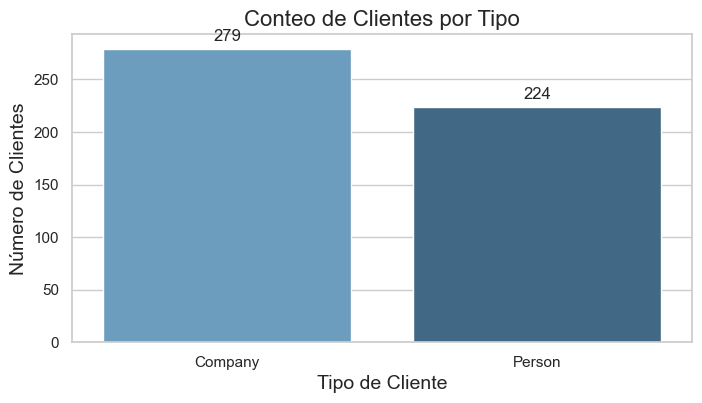

In [113]:
# Agrupar por 'dcu_CustomerType' y contar los clientes distintos en 'fos_CustomerKey'
conteo_clientes = df_.groupby('dcu_CustomerType')['fos_CustomerKey'].nunique().reset_index()

# Renombrar las columnas para mayor claridad
conteo_clientes.columns = ['Tipo de Cliente', 'Número de Clientes']

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Tipo de Cliente', y='Número de Clientes', data=conteo_clientes, palette="Blues_d")

# Agregar etiquetas y título
ax.set_title('Conteo de Clientes por Tipo', fontsize=16)
ax.set_xlabel('Tipo de Cliente', fontsize=14)
ax.set_ylabel('Número de Clientes', fontsize=14)

# Mostrar los valores en las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)

# Mostrar el gráfico
plt.show()

A Cuanto asciende el total de ventas?

In [29]:
# Sumar el total de ventas
total_ventas = df_['fos_SalesAmount'].sum()

# Mostrar el resultado
print(f'El monto total de ventas es: {total_ventas:,.2f}')

El monto total de ventas es: 2,718,202,629.81


### ¿Qué clientes me da más ingresos?

In [30]:
# Agrupar por 'dcu_CustomerType' y sumar los montos de ventas
ingresos_por_cliente = df.groupby('dcu_CustomerType')['fos_SalesAmount'].sum().reset_index()

# Renombrar las columnas para mayor claridad
ingresos_por_cliente.columns = ['Tipo de Cliente', 'Total de Ingresos']

# Calcular el total de ingresos
total_ingresos = ingresos_por_cliente['Total de Ingresos'].sum()

# Agregar una columna de cuota de ventas en porcentaje
ingresos_por_cliente['Cuota de Venta (%)'] = (ingresos_por_cliente['Total de Ingresos'] / total_ingresos) * 100

# Ordenar los resultados por ingresos en orden descendente
ingresos_por_cliente = ingresos_por_cliente.sort_values(by='Total de Ingresos', ascending=False)

# Mostrar la tabla con los ingresos por tipo de cliente y la cuota de venta
print(ingresos_por_cliente)


  Tipo de Cliente  Total de Ingresos  Cuota de Venta (%)
0         Company      2032448947.75               74.77
1          Person       685753682.06               25.23


C:\Users\Desarrollador\AppData\Local\Temp\ipykernel_16168\127266525.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo de Cliente', y='Total de Ingresos', data=ingresos_por_cliente, palette="Blues_d")


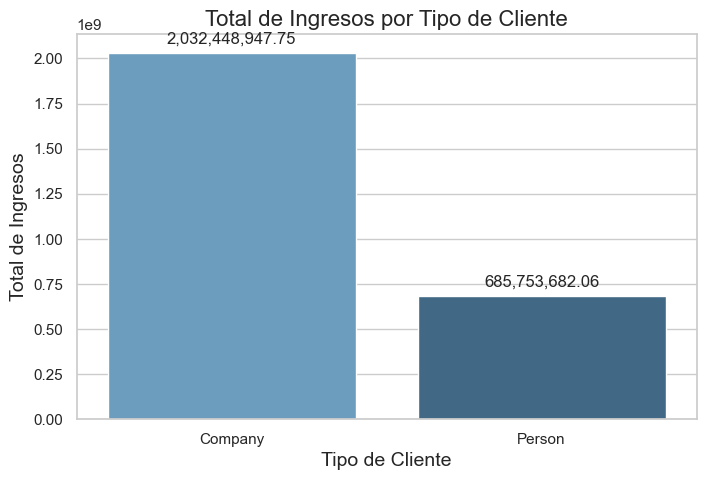

In [31]:
# Asegurarte de tener los mismos datos correctos
#ingresos_por_cliente = df.groupby('dcu_CustomerType')['fos_SalesAmount'].sum().reset_index()

# Renombrar las columnas para mayor claridad
#ingresos_por_cliente.columns = ['Tipo de Cliente', 'Total de Ingresos']

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Tipo de Cliente', y='Total de Ingresos', data=ingresos_por_cliente, palette="Blues_d")

# Añadir etiquetas y título
plt.title('Total de Ingresos por Tipo de Cliente', fontsize=16)
plt.xlabel('Tipo de Cliente', fontsize=14)
plt.ylabel('Total de Ingresos', fontsize=14)

# Mostrar los valores en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Mostrar el gráfico
plt.show()


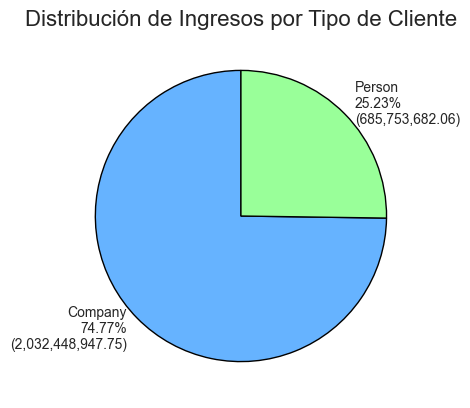

In [178]:
 
# Agrupar por 'dcu_CustomerType' y sumar los montos de ventas
#ingresos_por_cliente = df.groupby('dcu_CustomerType')['fos_SalesAmount'].sum().reset_index()

# Renombrar las columnas para mayor claridad
#ingresos_por_cliente.columns = ['Tipo de Cliente', 'Total de Ingresos']

# Calcular el total de ingresos
#total_ingresos = ingresos_por_cliente['Total de Ingresos'].sum()

# Agregar una columna de cuota de ventas en porcentaje
#ingresos_por_cliente['Cuota de Venta (%)'] = (ingresos_por_cliente['Total de Ingresos'] / total_ingresos) * 100

# Ordenar los resultados por ingresos en orden descendente
#ingresos_por_cliente = ingresos_por_cliente.sort_values(by='Total de Ingresos', ascending=False)

# Crear el gráfico circular con los valores correctos
plt.figure(figsize=(5, 4))

# Extraer los valores y etiquetas para el gráfico
valores = ingresos_por_cliente['Total de Ingresos'].values
etiquetas = ingresos_por_cliente['Tipo de Cliente'].values

# Preparar etiquetas personalizadas con los valores correctos
etiquetas_personalizadas = [
    f'{tipo}\n{cuota:.2f}%\n({ingreso:,.2f})' 
    for tipo, cuota, ingreso in zip(ingresos_por_cliente['Tipo de Cliente'], ingresos_por_cliente['Cuota de Venta (%)'], ingresos_por_cliente['Total de Ingresos'])
]

# Crear gráfico de pastel utilizando las etiquetas personalizadas
plt.pie(valores, labels=etiquetas_personalizadas,
        colors=['#66b3ff', '#99ff99'], startangle=90, wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 10}, labeldistance=1.1)

# Ajustar el layout para mejorar la visibilidad
plt.tight_layout()

# Agregar título
plt.title('Distribución de Ingresos por Tipo de Cliente', fontsize=16)

# Mostrar el gráfico
plt.show()


### Número de Ventas realizadas a Personas vs Compañias

C:\Users\atomasto\AppData\Local\Temp\ipykernel_19568\525432486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo de Cliente', y='Número de Órdenes Únicas', data=ordenes_por_tipo_cliente, palette="muted")


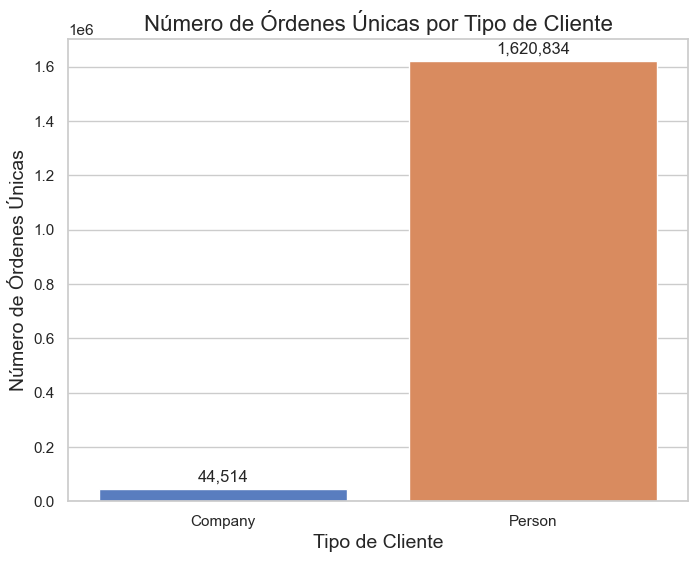

In [179]:
# Paso 1: Agrupar por 'dcu_CustomerType' y contar las órdenes únicas
ordenes_por_tipo_cliente = df_.groupby('dcu_CustomerType')['fos_SalesOrderNumber'].nunique().reset_index()

# Renombrar la columna para mayor claridad
ordenes_por_tipo_cliente.columns = ['Tipo de Cliente', 'Número de Órdenes Únicas']

# Paso 2: Graficar el número de órdenes únicas por tipo de cliente
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo de Cliente', y='Número de Órdenes Únicas', data=ordenes_por_tipo_cliente, palette="muted")

# Añadir etiquetas y título
plt.title('Número de Órdenes Únicas por Tipo de Cliente', fontsize=16)
plt.xlabel('Tipo de Cliente', fontsize=14)
plt.ylabel('Número de Órdenes Únicas', fontsize=14)

# Mostrar los valores en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)

# Mostrar el gráfico
plt.show()


### Arpu de Cliente vs Arpu de Compañia

C:\Users\atomasto\AppData\Local\Temp\ipykernel_19568\3591961452.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo de Cliente', y='ARPU', data=arpu_por_tipo, palette="muted")


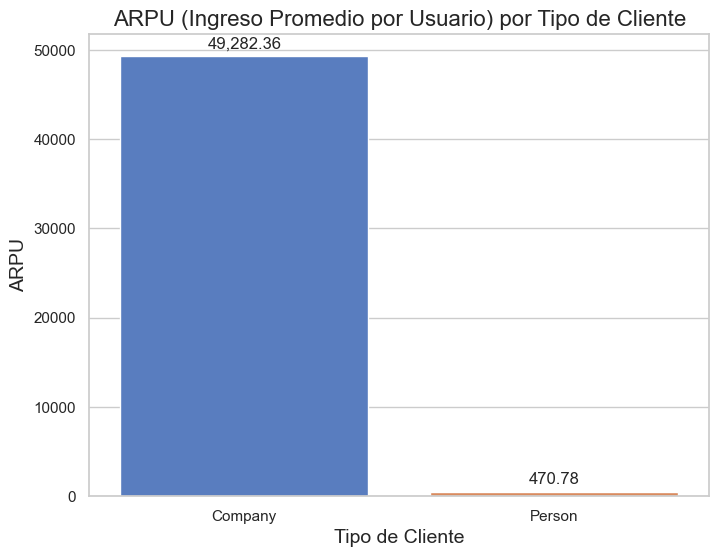

In [180]:
# Paso 1: Calcular el ingreso total por cliente
ingreso_por_cliente = df_.groupby(['dcu_CustomerType', 'fos_CustomerKey'])['fos_SalesAmount'].sum().reset_index()

# Paso 2: Calcular el número de órdenes por cliente
ordenes_por_cliente = df_.groupby(['dcu_CustomerType', 'fos_CustomerKey'])['fos_SalesOrderNumber'].nunique().reset_index()

# Unir las dos tablas por 'dcu_CustomerType' y 'fos_CustomerKey'
cliente_data = pd.merge(ingreso_por_cliente, ordenes_por_cliente, on=['dcu_CustomerType', 'fos_CustomerKey'])

# Renombrar las columnas para mayor claridad
cliente_data.columns = ['Tipo de Cliente', 'CustomerKey', 'Total de Ingresos', 'Número de Órdenes']

# Paso 3: Calcular el ARPU por cliente
cliente_data['ARPU'] = cliente_data['Total de Ingresos'] / cliente_data['Número de Órdenes']

# Paso 4: Calcular el ARPU promedio por tipo de cliente
arpu_por_tipo = cliente_data.groupby('Tipo de Cliente')['ARPU'].mean().reset_index()

# Paso 5: Graficar el ARPU por tipo de cliente
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo de Cliente', y='ARPU', data=arpu_por_tipo, palette="muted")

# Añadir etiquetas y título
plt.title('ARPU (Ingreso Promedio por Usuario) por Tipo de Cliente', fontsize=16)
plt.xlabel('Tipo de Cliente', fontsize=14)
plt.ylabel('ARPU', fontsize=14)

# Mostrar los valores en las barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)

# Mostrar el gráfico
plt.show()


## 2.2 - Productos AllData

### Cúantos Productos distintos se tienen en las ventas?

In [181]:
# Contar el número de productos únicos en 'dp_ProductName'
numero_productos_unicos = df_['dp_ProductName'].nunique()

# Mostrar el resultado
print(f'Número de productos únicos: {numero_productos_unicos}')


Número de productos únicos: 2516


### Cúal es el producto mas Vendido ?
Producto con mas unidades vendidas

C:\Users\atomasto\AppData\Local\Temp\ipykernel_19568\1905261129.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fos_SalesQuantity', y='dp_ProductName', data=top_10_productos, palette="viridis")


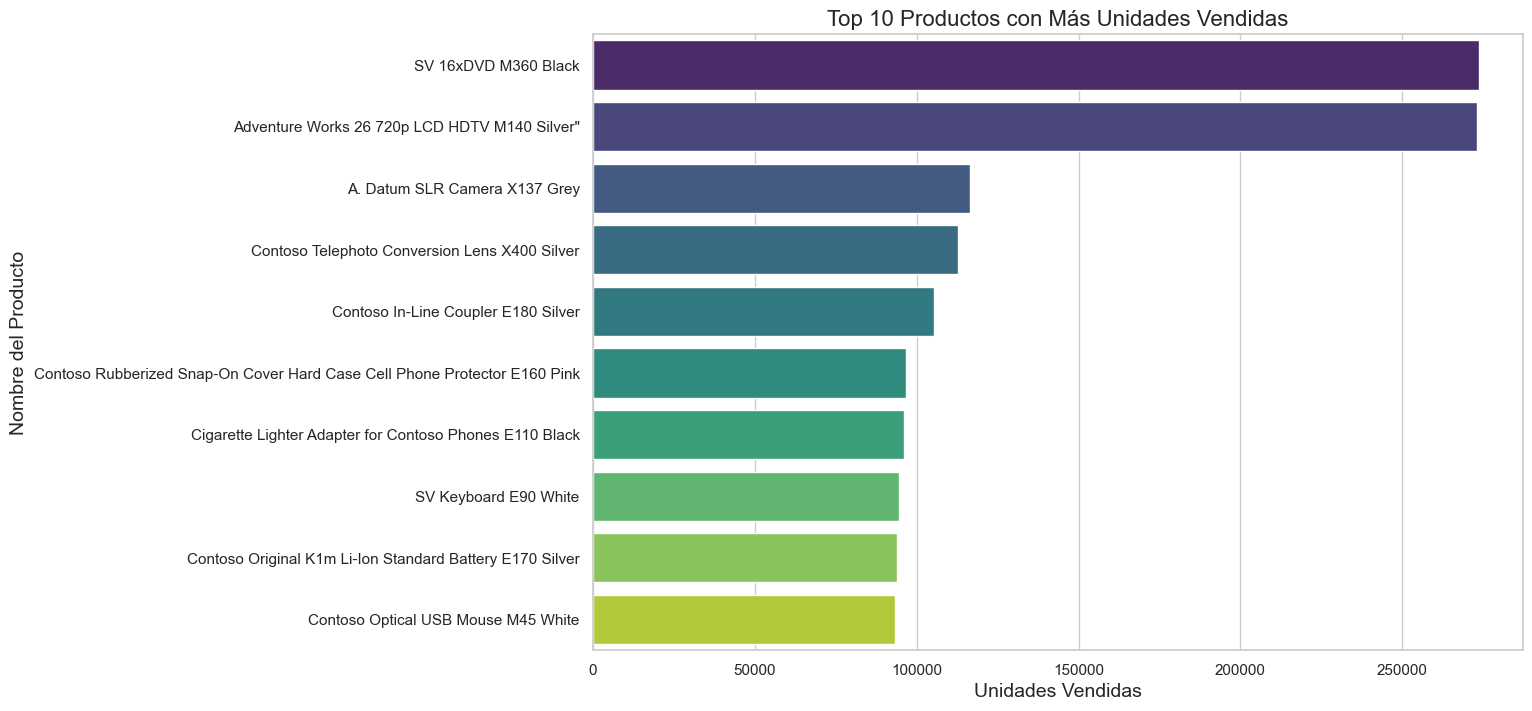

In [182]:
# Paso 1: Agrupar por 'dp_ProductName' y sumar las unidades vendidas
unidades_por_producto = df_.groupby('dp_ProductName')['fos_SalesQuantity'].sum().reset_index()

# Paso 2: Ordenar los productos por unidades vendidas en orden descendente
unidades_por_producto = unidades_por_producto.sort_values(by='fos_SalesQuantity', ascending=False)

# Paso 3: Seleccionar el top 10 de productos
top_10_productos = unidades_por_producto.head(10)

# Paso 4: Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
sns.barplot(x='fos_SalesQuantity', y='dp_ProductName', data=top_10_productos, palette="viridis")

# Añadir etiquetas y título
plt.title('Top 10 Productos con Más Unidades Vendidas', fontsize=16)
plt.xlabel('Unidades Vendidas', fontsize=14)
plt.ylabel('Nombre del Producto', fontsize=14)

# Mostrar el gráfico
plt.show()


### Participacion de las Marcas

## 2.3 - Series Temporales

### Numero de SalesOrder & Ventas ($)

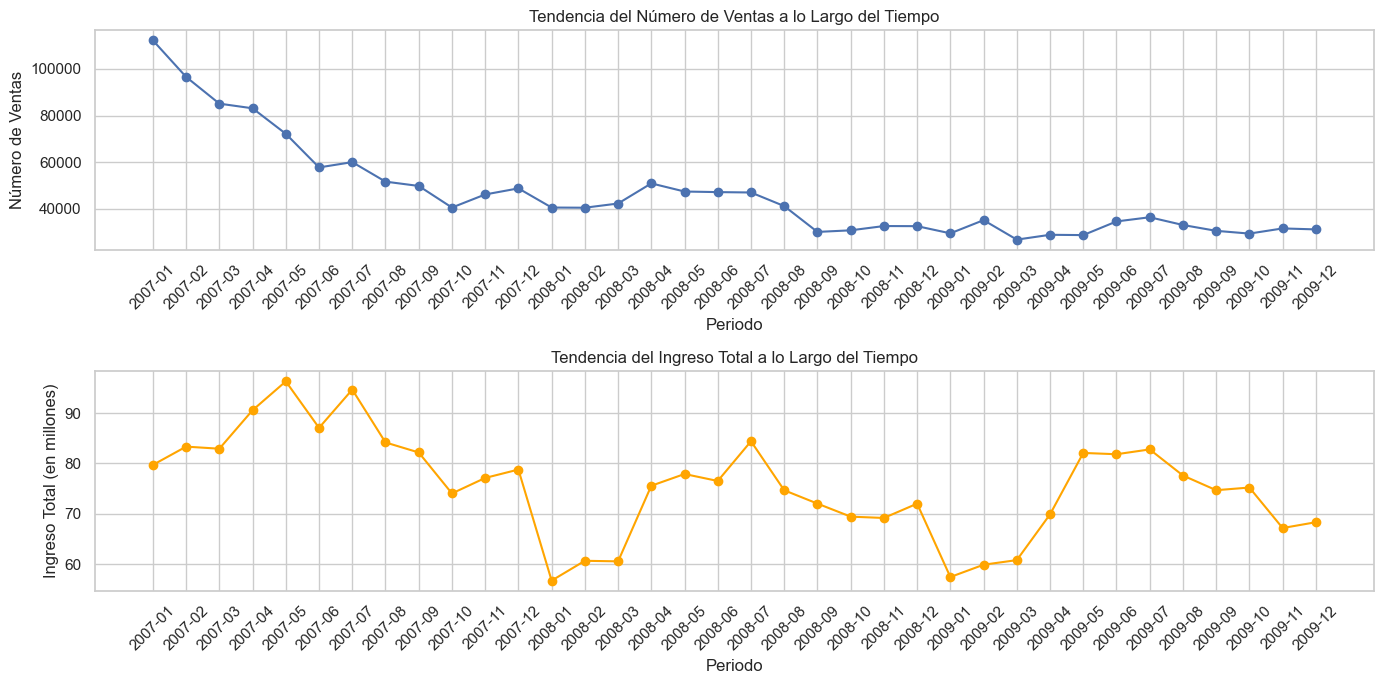

In [184]:
# Paso 1: Convertir 'fos_DateKey' a formato de fecha (ignorando el tiempo)
#df_['fos_DateKey'] = pd.to_datetime(df_['fos_DateKey']).dt.date

# Paso 2: Extraer año y mes para agrupar las ventas
#df_['YearMonth'] = pd.to_datetime(df_['fos_DateKey']).dt.to_period('M')

# Paso 3: Agrupar por 'YearMonth' y calcular el número de ventas y el ingreso total
ventas_por_mes = df_.groupby('YearMonth').agg({
    'fos_SalesOrderNumber': 'nunique',   # Número de ventas
    'fos_SalesAmount': 'sum'             # Ingreso total
}).reset_index()

# Renombrar las columnas para mayor claridad
ventas_por_mes.columns = ['Periodo', 'Numero de Ventas', 'Ingreso Total']

# Paso 4: Visualizar la tendencia de ventas y de ingresos
plt.figure(figsize=(14, 7))

# Gráfico de línea para el número de ventas
plt.subplot(2, 1, 1)
plt.plot(ventas_por_mes['Periodo'].astype(str), ventas_por_mes['Numero de Ventas'], marker='o')
plt.title('Tendencia del Número de Ventas a lo Largo del Tiempo')
plt.xlabel('Periodo')
plt.ylabel('Número de Ventas')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejorar la visibilidad

# Gráfico de línea para el ingreso total
plt.subplot(2, 1, 2)
plt.plot(ventas_por_mes['Periodo'].astype(str), ventas_por_mes['Ingreso Total'], marker='o', color='orange')
plt.title('Tendencia del Ingreso Total a lo Largo del Tiempo')
plt.xlabel('Periodo')
plt.ylabel('Ingreso Total (en millones)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejorar la visibilidad

# Formatear los números en el eje Y para que sean más legibles
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))

# Ajustar el layout
plt.tight_layout()
plt.show()


▲ Se observa que 2007-05 se tienen los mayores ingresos, sin embargo la cantidad de Ordenes no fue la mas alta.
  
  Hipotesis 01 :
  El alza en las ventas($) es por que se ha tenido altas compras de las compañias y tambien ha sido un buen mes para las ventas a personas.

### Cantidad SalesOrder & Ventas($)  / Comparativo: Compañia vs Personas

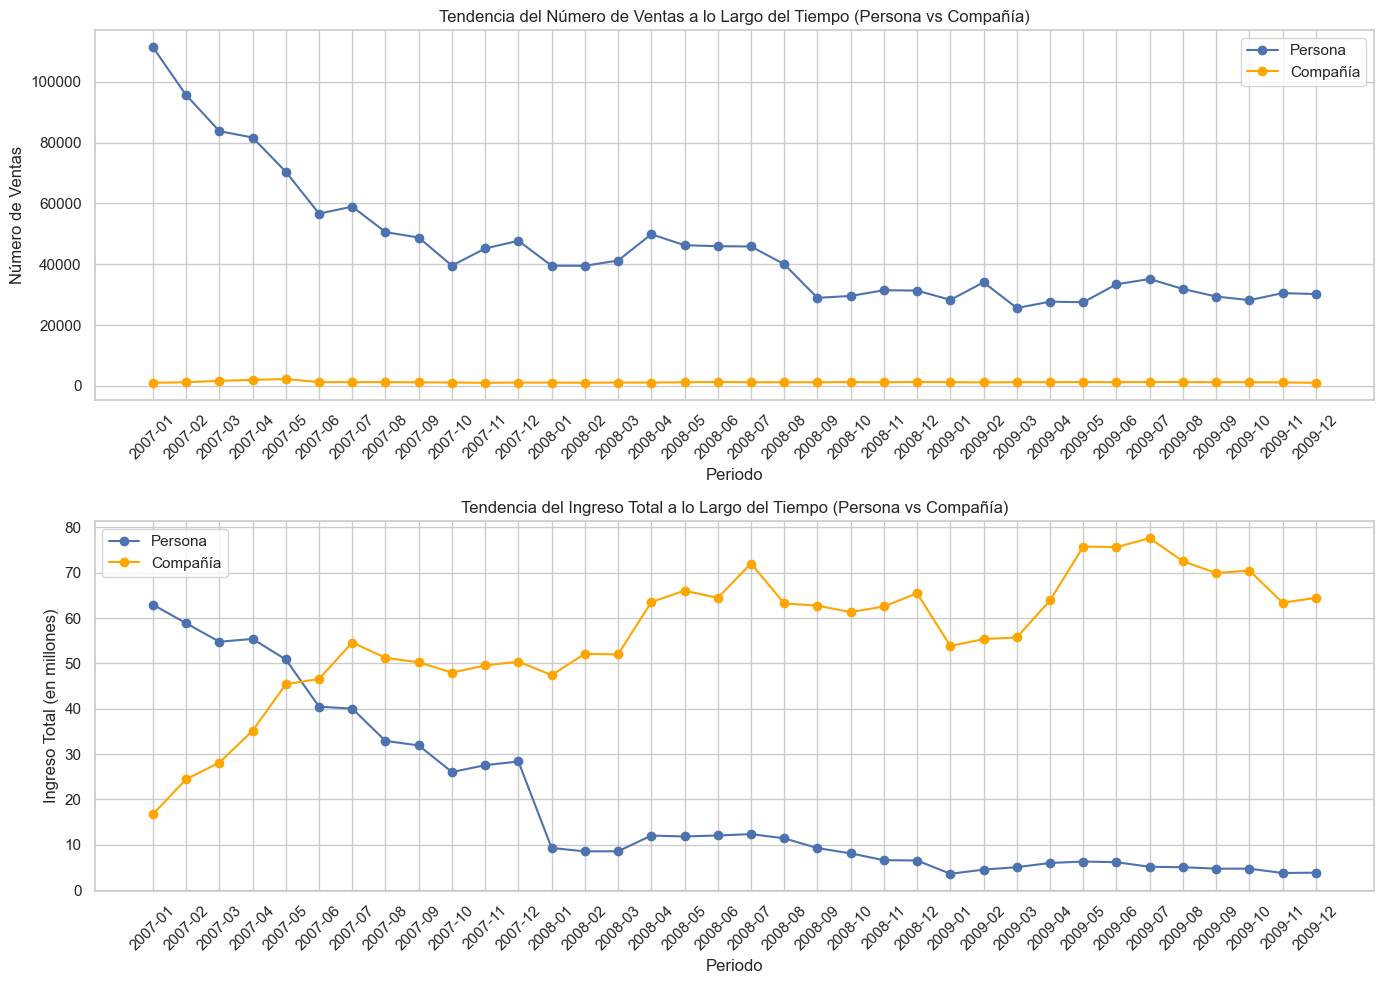

In [188]:
# Paso 3: Filtrar los datos por tipo de cliente (Persona y Compañía)
df_persona = df_[df_['dcu_CustomerType'] == 'Person']
df_compania = df_[df_['dcu_CustomerType'] == 'Company']

# Paso 4: Agrupar por 'YearMonth' y calcular el número de ventas y el ingreso total para cada tipo de cliente
ventas_persona = df_persona.groupby('YearMonth').agg({
    'fos_SalesOrderNumber': 'nunique',
    'fos_SalesAmount': 'sum'
}).reset_index()

ventas_compania = df_compania.groupby('YearMonth').agg({
    'fos_SalesOrderNumber': 'nunique',
    'fos_SalesAmount': 'sum'
}).reset_index()

# Renombrar las columnas para mayor claridad
ventas_persona.columns = ['Periodo', 'Numero de Ventas', 'Ingreso Total']
ventas_compania.columns = ['Periodo', 'Numero de Ventas', 'Ingreso Total']

# Paso 5: Visualizar la tendencia de ventas y de ingresos comparando Persona vs Compañía
plt.figure(figsize=(14, 10))

# Gráfico de línea para el número de ventas
plt.subplot(2, 1, 1)
plt.plot(ventas_persona['Periodo'].astype(str), ventas_persona['Numero de Ventas'], marker='o', label='Persona')
plt.plot(ventas_compania['Periodo'].astype(str), ventas_compania['Numero de Ventas'], marker='o', label='Compañía', color='orange')
plt.title('Tendencia del Número de Ventas a lo Largo del Tiempo (Persona vs Compañía)')
plt.xlabel('Periodo')
plt.ylabel('Número de Ventas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Gráfico de línea para el ingreso total
plt.subplot(2, 1, 2)
plt.plot(ventas_persona['Periodo'].astype(str), ventas_persona['Ingreso Total'], marker='o', label='Persona')
plt.plot(ventas_compania['Periodo'].astype(str), ventas_compania['Ingreso Total'], marker='o', label='Compañía', color='orange')
plt.title('Tendencia del Ingreso Total a lo Largo del Tiempo (Persona vs Compañía)')
plt.xlabel('Periodo')
plt.ylabel('Ingreso Total (en millones)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Formatear los números en el eje Y para que sean más legibles
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))

# Ajustar el layout
plt.tight_layout()
plt.show()


▲ Como se observa en las imagenes:
+ Hipotesis (01) : Se Contraste lo dicho ya que lo que realmente ha echo que sea un buen mes ha sido las compras($) de los clientes, no tanto las compras de las compañias ya que estos estan por debajo del promedio(a simple vista).

### Cantidad SalesOrder & Ventas($) & Total  / Comparativo: Compañia vs Personas

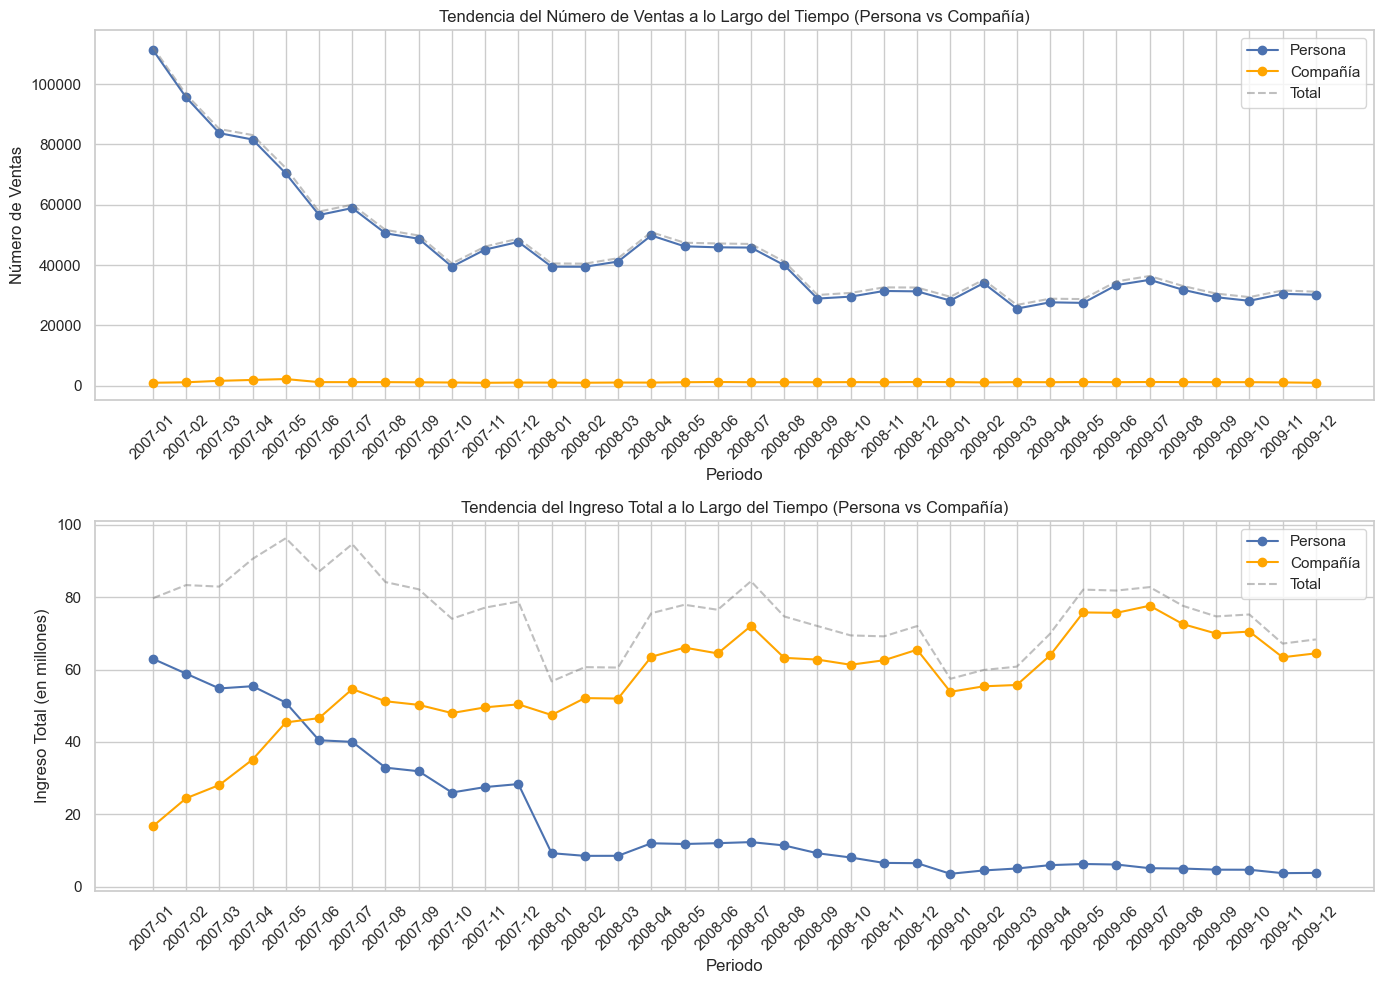

In [186]:
# Filtrar los datos por tipo de cliente (Persona y Compañía)
df_persona = df_[df_['dcu_CustomerType'] == 'Person']
df_compania = df_[df_['dcu_CustomerType'] == 'Company']

# Agrupar por 'YearMonth' y calcular el número de ventas y el ingreso total para cada tipo de cliente
ventas_persona = df_persona.groupby('YearMonth').agg({
    'fos_SalesOrderNumber': 'nunique',
    'fos_SalesAmount': 'sum'
}).reset_index()

ventas_compania = df_compania.groupby('YearMonth').agg({
    'fos_SalesOrderNumber': 'nunique',
    'fos_SalesAmount': 'sum'
}).reset_index()

# Calcular los totales (sumando Persona y Compañía)
ventas_totales = df_.groupby('YearMonth').agg({
    'fos_SalesOrderNumber': 'nunique',
    'fos_SalesAmount': 'sum'
}).reset_index()

# Renombrar las columnas para mayor claridad
ventas_persona.columns = ['Periodo', 'Numero de Ventas', 'Ingreso Total']
ventas_compania.columns = ['Periodo', 'Numero de Ventas', 'Ingreso Total']
ventas_totales.columns = ['Periodo', 'Numero de Ventas', 'Ingreso Total']

# Paso 5: Visualizar la tendencia de ventas y de ingresos comparando Persona vs Compañía, con la línea de totales
plt.figure(figsize=(14, 10))

# Gráfico de línea para el número de ventas
plt.subplot(2, 1, 1)
plt.plot(ventas_persona['Periodo'].astype(str), ventas_persona['Numero de Ventas'], marker='o', label='Persona')
plt.plot(ventas_compania['Periodo'].astype(str), ventas_compania['Numero de Ventas'], marker='o', label='Compañía', color='orange')
plt.plot(ventas_totales['Periodo'].astype(str), ventas_totales['Numero de Ventas'], marker='', linestyle='--', color='gray', label='Total', alpha=0.5)
plt.title('Tendencia del Número de Ventas a lo Largo del Tiempo (Persona vs Compañía)')
plt.xlabel('Periodo')
plt.ylabel('Número de Ventas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Gráfico de línea para el ingreso total
plt.subplot(2, 1, 2)
plt.plot(ventas_persona['Periodo'].astype(str), ventas_persona['Ingreso Total'], marker='o', label='Persona')
plt.plot(ventas_compania['Periodo'].astype(str), ventas_compania['Ingreso Total'], marker='o', label='Compañía', color='orange')
plt.plot(ventas_totales['Periodo'].astype(str), ventas_totales['Ingreso Total'], marker='', linestyle='--', color='gray', label='Total', alpha=0.5)
plt.title('Tendencia del Ingreso Total a lo Largo del Tiempo (Persona vs Compañía)')
plt.xlabel('Periodo')
plt.ylabel('Ingreso Total (en millones)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Formatear los números en el eje Y para que sean más legibles
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))

# Ajustar el layout
plt.tight_layout()
plt.show()


↑ ▲ Se observa una caida estrepitosa en las ventas(S/) de las personas.

 Lo que esta salvando a la empresa son las ventas(S/) a de las compañias a pesar de que se tienen pocas OrdenesCompra en las compañias estas representan alto monto de Venta(S/) ya que el ARPU de las compañias es mas alto

### Utilidades (S/) / Comparativo: Compañia vs Personas

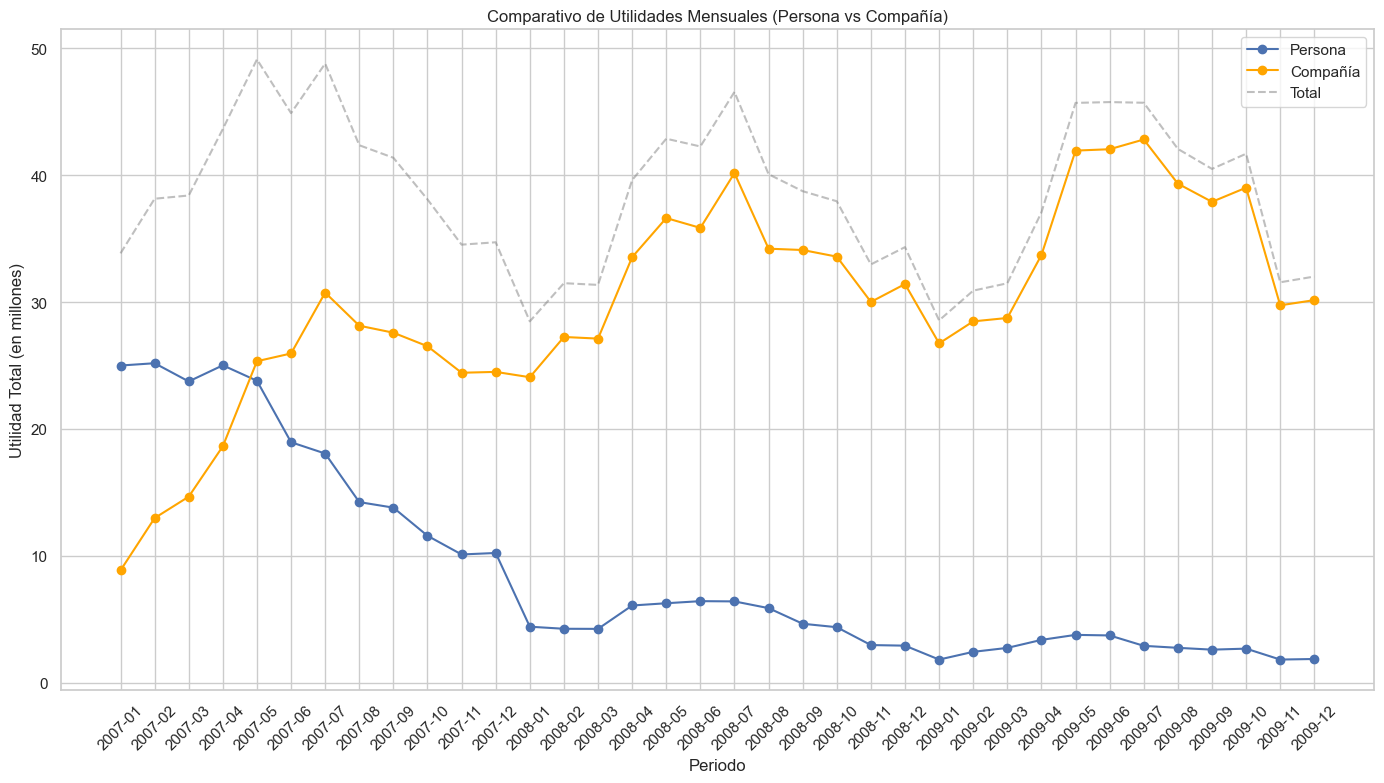

In [187]:
# Paso 1: Calcular la utilidad por transacción
# df_['Utilidad'] = df_['fos_SalesAmount'] - df_['fos_TotalCost']

# Paso 2: Convertir 'fos_DateKey' a formato de fecha (ignorando el tiempo)
#df_['fos_DateKey'] = pd.to_datetime(df_['fos_DateKey']).dt.date

# Paso 3: Extraer año y mes para agrupar las utilidades
#df_['YearMonth'] = pd.to_datetime(df_['fos_DateKey']).dt.to_period('M')

# Paso 4: Filtrar los datos por tipo de cliente (Persona y Compañía)
df_persona = df_[df_['dcu_CustomerType'] == 'Person']
df_compania = df_[df_['dcu_CustomerType'] == 'Company']

# Paso 5: Agrupar por 'YearMonth' y calcular la utilidad total para cada tipo de cliente
utilidad_persona = df_persona.groupby('YearMonth')['Utilidad'].sum().reset_index()
utilidad_compania = df_compania.groupby('YearMonth')['Utilidad'].sum().reset_index()

# Calcular la utilidad total (sumando Persona y Compañía)
utilidad_total = df_.groupby('YearMonth')['Utilidad'].sum().reset_index()

# Renombrar las columnas para mayor claridad
utilidad_persona.columns = ['Periodo', 'Utilidad Total']
utilidad_compania.columns = ['Periodo', 'Utilidad Total']
utilidad_total.columns = ['Periodo', 'Utilidad Total']

# Paso 6: Visualizar la utilidad mensual comparando Persona vs Compañía, con la línea de totales
plt.figure(figsize=(14, 8))

# Gráfico de línea para la utilidad
plt.plot(utilidad_persona['Periodo'].astype(str), utilidad_persona['Utilidad Total'], marker='o', label='Persona')
plt.plot(utilidad_compania['Periodo'].astype(str), utilidad_compania['Utilidad Total'], marker='o', label='Compañía', color='orange')
plt.plot(utilidad_total['Periodo'].astype(str), utilidad_total['Utilidad Total'], marker='', linestyle='--', color='gray', label='Total', alpha=0.5)
plt.title('Comparativo de Utilidades Mensuales (Persona vs Compañía)')
plt.xlabel('Periodo')
plt.ylabel('Utilidad Total (en millones)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Formatear los números en el eje Y para que sean más legibles
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))

# Ajustar el layout
plt.tight_layout()
plt.show()


## Correlacion

In [58]:
# Lista de las columnas que quieres filtrar
columnas_ = [
                       'fos_SalesQuantity',
                      'fos_SalesAmount','fos_ReturnQuantity','fos_ReturnAmount','fos_DiscountQuantity','fos_DiscountAmount',
                      'fos_TotalCost',
                      'fos_UnitPrice', #'dcu_BirthDate',
                      'dcu_Edad',
                      #'dcu_MaritalStatus','dcu_Gender',
                      #'dcu_YearlyIncome','dcu_TotalChildren','dcu_NumberChildrenAtHome',
                      #'dcu_Education','dcu_Occupation','dcu_HouseOwnerFlag',
                      'dcu_NumberCarsOwned'
                      #,'dcu_CustomerType',
                      #'dcu_CompanyName','dp_ProductName','dp_Manufacturer','dp_BrandName',
                      #'dp_ClassName','dp_ColorID','dp_ColorName','ds_StoreName'
                      ]

df_encod = df_[columnas_].copy()

In [59]:
# Paso 2: Aplicar Label Encoding a las columnas especificadas
label_enc_cols = ['dcu_HouseOwnerFlag', 'dcu_CustomerType', 'dcu_Education']
for col in label_enc_cols:
    le = LabelEncoder()
    df_encod[col] = le.fit_transform(df_[col])

In [61]:
# Paso 3: Aplicar One-Hot Encoding a las columnas especificadas
one_hot_enc_cols = [
    'dcu_MaritalStatus', 'dcu_Gender', 'dcu_Occupation',
     #'dp_Manufacturer',
    'dp_BrandName', 
    'dp_ClassName',# 'dp_ColorName',
    'ds_StoreName'
]

df_encod = pd.concat([df_encod, pd.get_dummies(df_[one_hot_enc_cols], drop_first=True)], axis=1)

In [63]:
# Mostrar el DataFrame resultante
df_encod.head()

,fos_SalesQuantity,fos_SalesAmount,fos_ReturnQuantity,fos_ReturnAmount,fos_DiscountQuantity,fos_DiscountAmount,fos_TotalCost,fos_UnitPrice,dcu_Edad,dcu_NumberCarsOwned,dcu_HouseOwnerFlag,dcu_CustomerType,dcu_Education,dcu_MaritalStatus_S,dcu_Gender_M,dcu_Occupation_Management,dcu_Occupation_Manual,dcu_Occupation_Professional,dcu_Occupation_Skilled Manual,dp_BrandName_Adventure Works,dp_BrandName_Adventure Works,dp_BrandName_Contoso,dp_BrandName_Contoso,dp_BrandName_Fabrikam,dp_BrandName_Fabrikam,dp_BrandName_Litware,dp_BrandName_Litware,dp_BrandName_Northwind Traders,dp_BrandName_Proseware,dp_BrandName_Southridge Video,dp_BrandName_Tailspin Toys,dp_BrandName_The Phone Company,dp_BrandName_Wide World Importers,dp_ClassName_Economy,dp_ClassName_Regular,ds_StoreName_Contoso Europe Online Store,ds_StoreName_Contoso North America Online Store
0,1,10.36,0,0.00,1,2.59,6.60,12.95,61,0.00,1,1,1,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,1,10.36,0,0.00,1,2.59,6.60,12.95,62,0.00,1,1,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,1,10.36,0,0.00,1,2.59,6.60,12.95,63,0.00,1,1,0,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,1,10.36,0,0.00,1,2.59,6.60,12.95,63,0.00,1,1,0,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,1,10.36,0,0.00,1,2.59,6.60,12.95,62,0.00,1,1,1,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [64]:
df_encod.shape

(12527442, 37)

In [65]:
#correlation matrix
corrmat = df_encod.corr()

<Axes: >

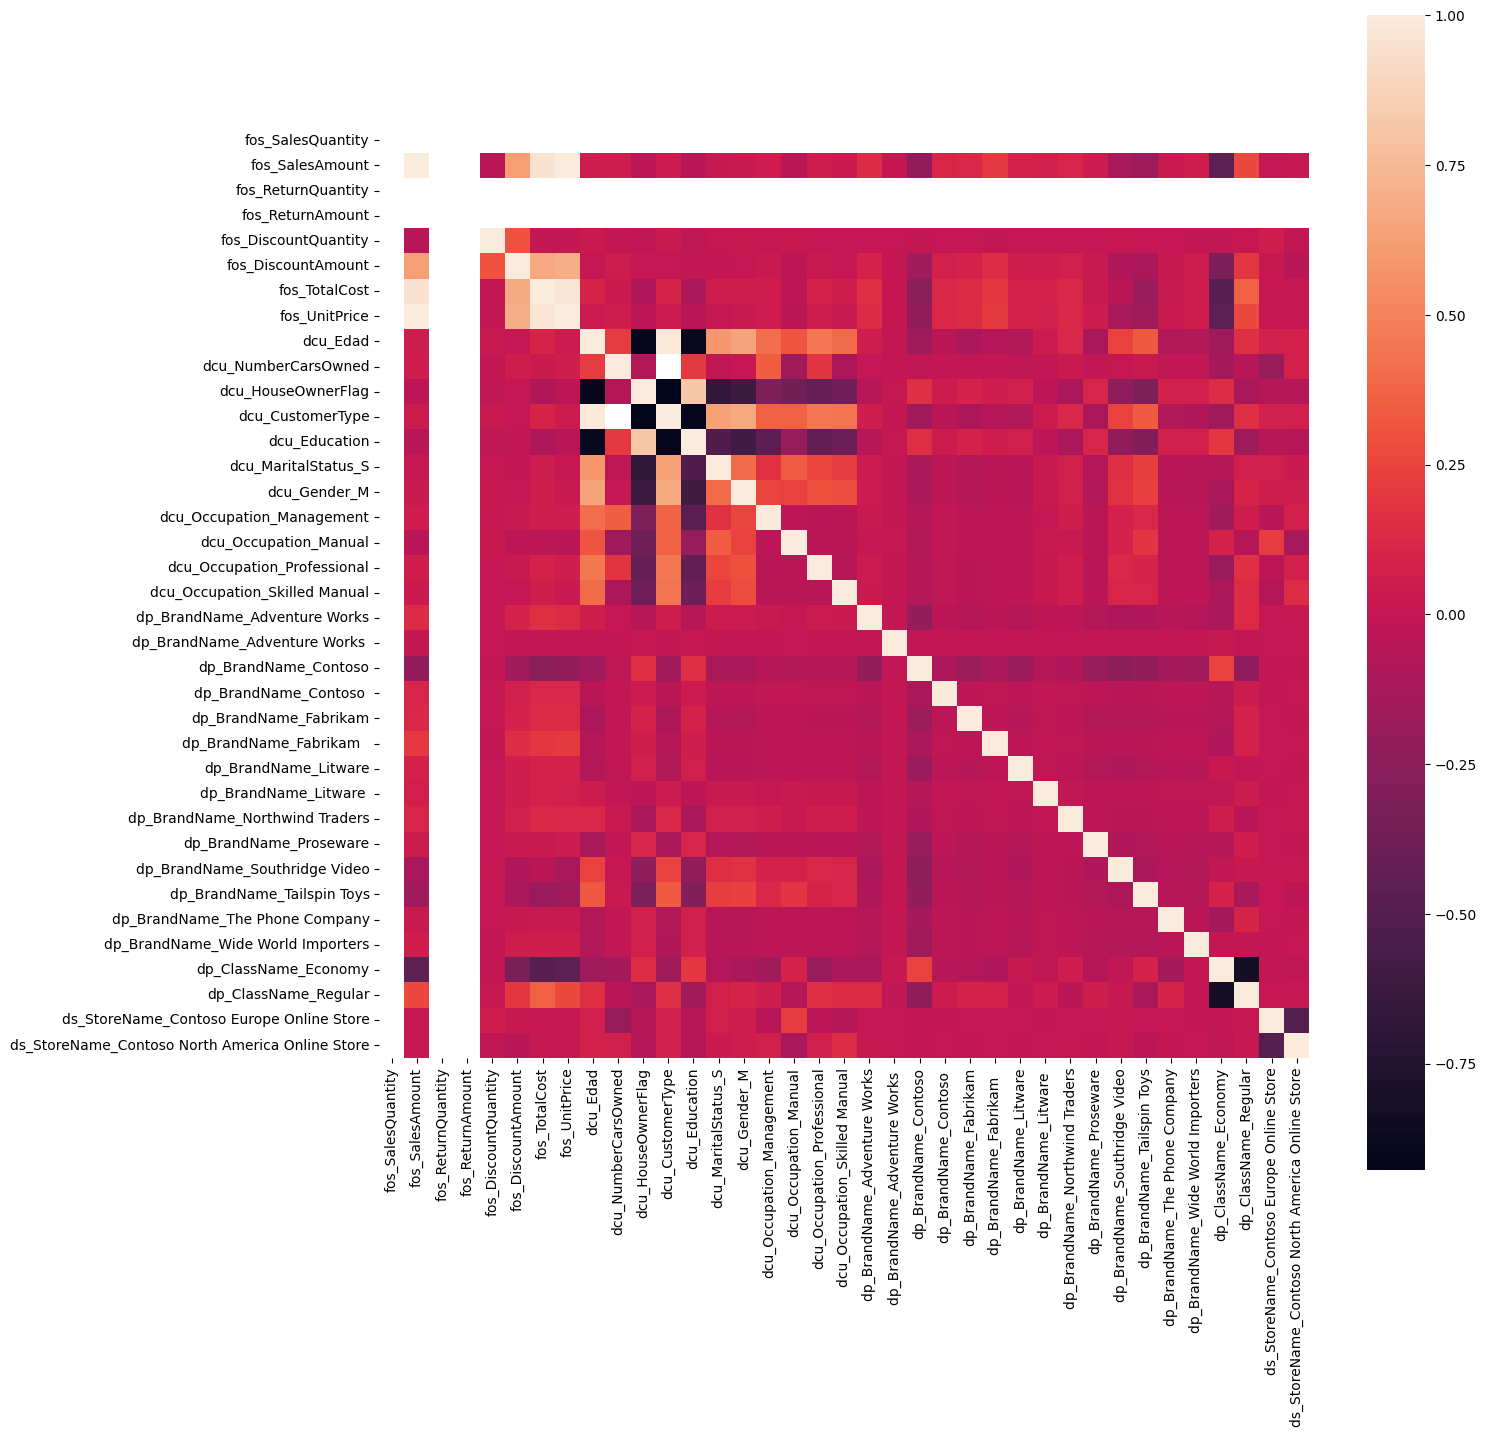

In [66]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax= 1, square=True)

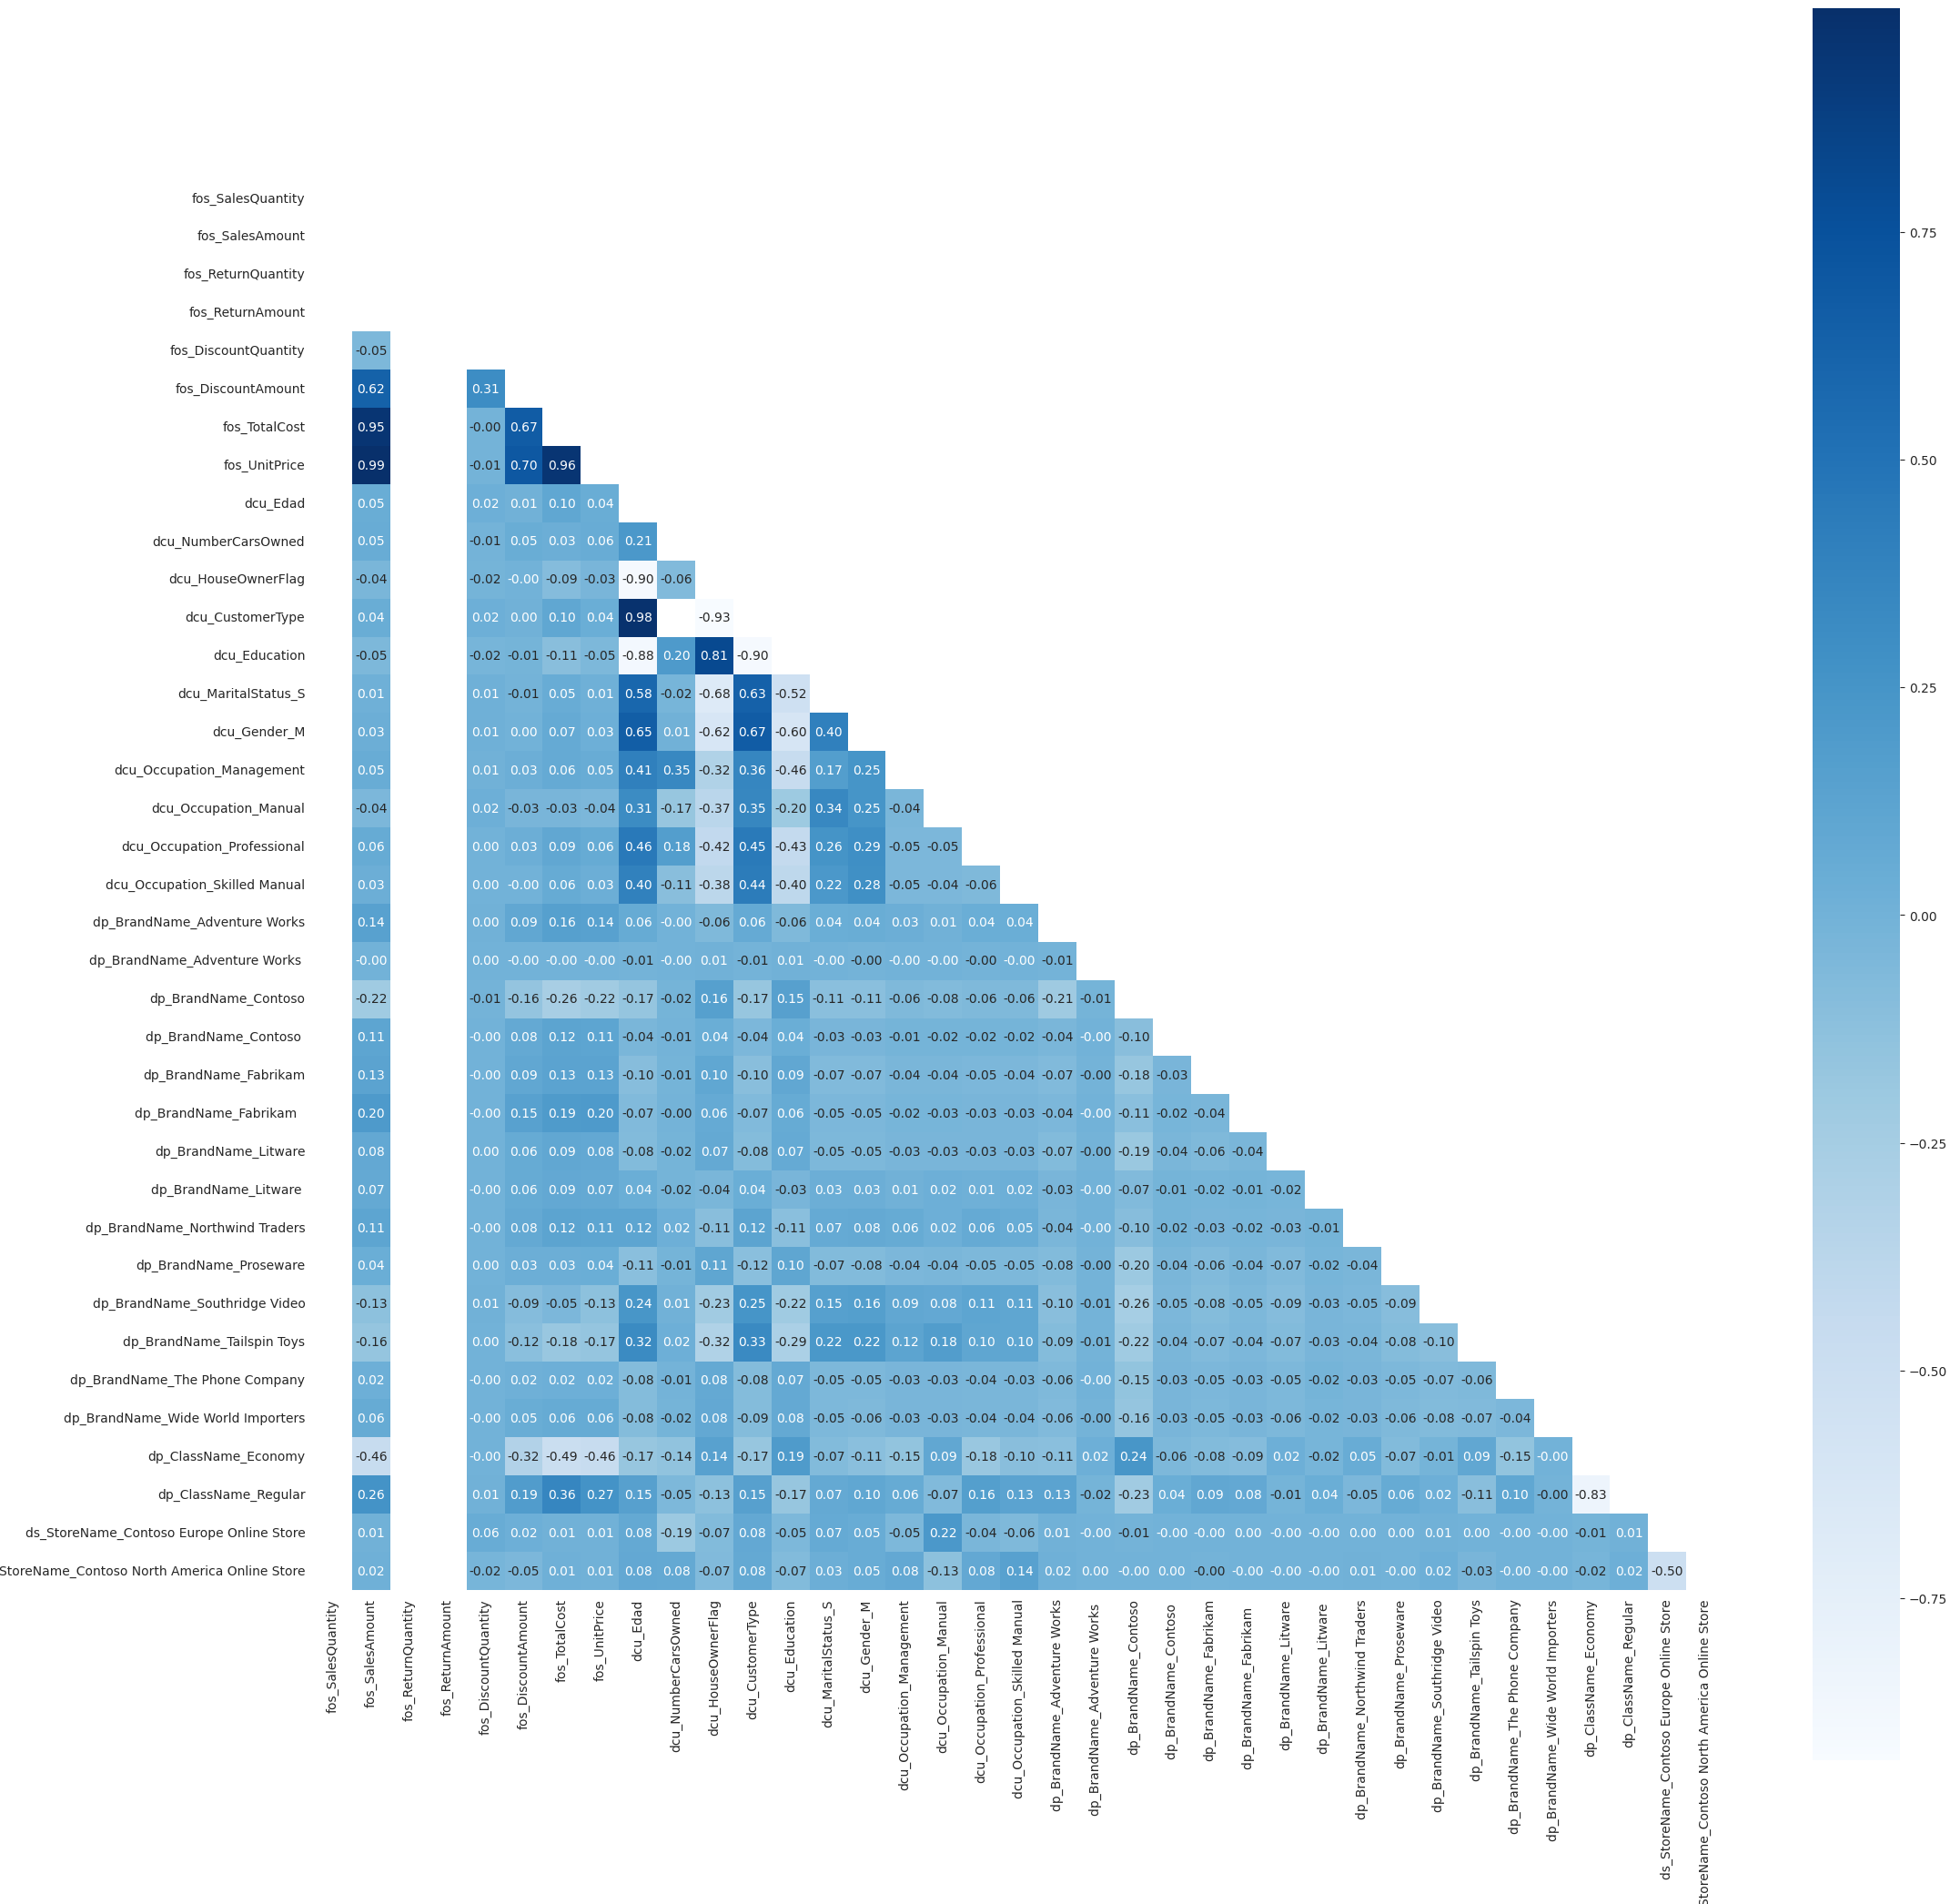

In [69]:
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 25))
    ax = sns.heatmap(corrmat, cmap="Blues", mask=mask, square=True, fmt='.2f', annot=True)

In [70]:
# Calcular la correlación entre 'fos_SalesAmount' y todas las demás variables
corr_with_sales = corrmat['fos_SalesAmount'].sort_values(ascending=False)

# Filtrar para mostrar solo las correlaciones fuertes (por ejemplo, por encima de 0.5 o por debajo de -0.5)
strong_corr = corr_with_sales[(corr_with_sales > 0.5) | (corr_with_sales < -0.5)]

# Mostrar el resultado en formato tabla
strong_corr_df = pd.DataFrame(strong_corr).reset_index()
strong_corr_df.columns = ['Variable', 'Correlación con fos_SalesAmount']

# Mostrar el DataFrame resultante
strong_corr_df


,Variable,Correlación con fos_SalesAmount
0,fos_SalesAmount,1.00
1,fos_UnitPrice,0.99
2,fos_TotalCost,0.95
3,fos_DiscountAmount,0.62
